In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/rafael/Downloads/ipeadata[10-06-2017-06-04].csv', header=0, sep=',', usecols=[0,1],
                 parse_dates=[0,], dayfirst=True)

In [3]:
df.head()

,Data,Taxa de câmbio - R$ / US$ - comercial - venda - média - R$ - Banco Central do Brasil
0,1985-01-02,1.157818e-09
1,1985-01-03,1.157818e-09
2,1985-01-04,1.157818e-09
3,1985-01-05,NaN
4,1985-01-06,NaN


In [4]:
df = df.dropna()

In [5]:
df.describe()

,Taxa de câmbio - R$ / US$ - comercial - venda - média - R$ - Banco Central do Brasil
count,8.116000e+03
mean,1.491383e+00
std,1.140035e+00
min,1.157818e-09
25%,7.198509e-03
50%,1.744150e+00
75%,2.277925e+00
max,4.194900e+00


In [6]:
df = df[df['Data'] > '03/01/1994']

In [7]:
df.head()

,Data,Taxa de câmbio - R$ / US$ - comercial - venda - média - R$ - Banco Central do Brasil
3346,1994-03-02,0.239028
3347,1994-03-03,0.242729
3348,1994-03-04,0.246495
3351,1994-03-07,0.250310
3352,1994-03-08,0.254201


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 3346 to 11846
Data columns (total 2 columns):
Data                                                                                    5834 non-null datetime64[ns]
Taxa de câmbio - R$ / US$ - comercial - venda - média - R$ - Banco Central do Brasil    5834 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.7 KB


In [9]:
df.columns = ['Data', 'Cotacao_Venda']

In [10]:
df.Cotacao_Venda.min(), df.Cotacao_Venda.max()

(0.23902763636363603, 4.1948999999999996)

In [36]:
#df.Cotacao_Venda = (df.Cotacao_Venda - df.Cotacao_Venda.mean()) / df.Cotacao_Venda.std()

In [11]:
df.Cotacao_Venda.min(), df.Cotacao_Venda.max()

(0.23902763636363603, 4.1948999999999996)

In [58]:
test_amount = int(len(df)*0.1)
training_amount = len(df) - test_amount

training_data, test_data = df.head(training_amount), df.tail(test_amount)
print("Training amount: %s. Test amount: %s. Total: %s" % (len(training_data), len(test_data), len(df)))

Training amount: 5251. Test amount: 583. Total: 5834


In [60]:
test_data.head()

,Data,Cotacao_Venda
10995,2015-02-09,0.916991
10996,2015-02-10,0.942890
10997,2015-02-11,1.007125
10998,2015-02-12,1.013408
10999,2015-02-13,0.983534


In [61]:
training_data.to_csv('training_data.csv', encoding='utf-8')
test_data.to_csv('test_data.csv', encoding='utf-8')

In [1]:
import pandas as pd

train_data = pd.read_csv('training_data.csv', index_col=0)
test_data = pd.read_csv('test_data.csv', index_col=0)

In [2]:
train_data.head()

,Data,Cotacao_Venda
3346,1994-03-02,-2.350227
3347,1994-03-03,-2.345481
3348,1994-03-04,-2.340653
3351,1994-03-07,-2.335761
3352,1994-03-08,-2.330772


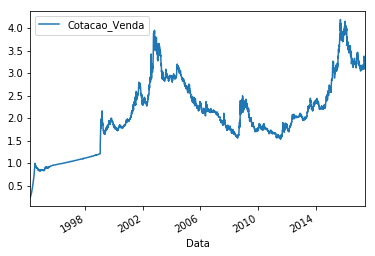

In [12]:
%matplotlib inline

df.plot(x='Data', y='Cotacao_Venda')

In [23]:
import numpy as np

test_X = test_data.Cotacao_Venda.values
test_Y = np.array(list(test_data.Cotacao_Venda.values[1:]) + list(test_data.Cotacao_Venda.values[:1]))

train_X = train_data.Cotacao_Venda.values
train_Y = np.array(list(train_data.Cotacao_Venda.values[1:]) + list(train_data.Cotacao_Venda.values[:1]))

In [24]:
print(test_X[:10], test_Y[:10])

[ 0.91699131  0.94289035  1.0071251   1.01340755  0.9835339   0.988406
  1.0031505   1.02315174  1.03725518  1.01648466] [ 0.94289035  1.0071251   1.01340755  0.9835339   0.988406    1.0031505
  1.02315174  1.03725518  1.01648466  1.01610002]


In [36]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, 1))
test_X = np.reshape(test_X, (test_X.shape[0], 1, 1)) 

In [37]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import time

In [38]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

/home/rafael/prj/udacity/lib/python3.4/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/home/rafael/prj/udacity/lib/python3.4/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(None, 1), return_sequences=True, units=50)`
  import sys


compilation time :  0.012559175491333008


/home/rafael/prj/udacity/lib/python3.4/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [56]:
model.fit(
    train_X,
    train_Y,
    batch_size=512,
    epochs=10,
    validation_split=0.05)

Train on 4988 samples, validate on 263 samples
Epoch 1/10
4988/4988 [==============================] - 0s - loss: 0.5673 - val_loss: 0.2727
Epoch 2/10
4988/4988 [==============================] - 0s - loss: 0.4217 - val_loss: 0.2506
Epoch 3/10
4988/4988 [==============================] - 0s - loss: 0.2867 - val_loss: 0.1810
Epoch 4/10
4988/4988 [==============================] - 0s - loss: 0.1704 - val_loss: 0.1040
Epoch 5/10
4988/4988 [==============================] - 0s - loss: 0.0869 - val_loss: 0.0557
Epoch 6/10
4988/4988 [==============================] - 0s - loss: 0.0409 - val_loss: 0.0396
Epoch 7/10
4988/4988 [==============================] - 0s - loss: 0.0212 - val_loss: 0.0400
Epoch 8/10
4988/4988 [==============================] - 0s - loss: 0.0145 - val_loss: 0.0411
Epoch 9/10
4988/4988 [==============================] - 0s - loss: 0.0115 - val_loss: 0.0418
Epoch 10/10
4988/4988 [==============================] - 0s - loss: 0.0096 - val_loss: 0.0412


In [15]:
import numpy as np

def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [16]:
window = 22
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (5230, 22, 2)
y_train (5230,)
X_test (581, 22, 2)
y_test (581,)


In [19]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

def build_model2(layers):
    d = 0.2
    model = Sequential()
    model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
    model.add(Dense(16,init='uniform',activation='relu'))        
    model.add(Dense(1,init='uniform',activation='linear'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [20]:
model = build_model2([2,window,1])

/home/rafael/prj/udacity/lib/python3.4/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/rafael/prj/udacity/lib/python3.4/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  del sys.path[0]


In [21]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=10,
    validation_split=0.1,
    verbose=1)

Train on 4707 samples, validate on 523 samples
Epoch 1/10


TypeError: float() argument must be a string or a number, not 'Timestamp'